
# Exploratory Data Analysis (EDA) on Apartment Prices
This notebook performs an Exploratory Data Analysis (EDA) on apartment prices for December 2023 and August 2024. We will begin by loading the data, followed by cleaning, visualizing, and comparing the prices across different areas. Data from December 2023 were collected with web scraping of halooglasi.com website, while for August 2024, data were collected by web scraping both halooglasi.com and nekretnine.rs websites, both saved as excel files as the output of the web scraping scripts in the same repository. 

## Data Loading
We'll start by loading and inspecting the data for December 2023 and August 2024.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_dec_halooglasi = pd.read_excel('Excel_files\\Data 01.12.2023..xlsx')
df_dec_halooglasi.head(10)
df_aug_halooglasi = pd.read_excel("Excel_files\\Data 11.08.24..xlsx")
df_aug_halooglasi.head(10)


,area,sq_meters,room_number,price,heating,floor
0,Opština Stari grad,45 m2,1.5,900€,CG,4
1,Opština Voždovac,43 m2,1.0,600€,Gas,3
2,Opština Zvezdara,34 m2,0.5,350€,EG,2
3,Opština Savski venac,78 m2,3.0,1.100€,CG,2
4,Opština Voždovac,50 m2,1.5,350€,EG,PR
5,Opština Grocka,45 m2,2.5,350€,CG,1
6,Opština Rakovica,"49,10 m2",2.0,500€,Gas,5
7,Opština Zvezdara,70 m2,3.0,700€,Gas,3
8,Opština Čukarica,48 m2,1.5,350€,CG,2
9,Opština Novi Beograd,45 m2,2.0,750€,CG,3


We want to check prices per area and compare between months and websites to see the diferences in prices. First we want to check which areas have the highest frequencies so we can include only areas with more than 10 occurrences.

In [2]:
print(df_dec_halooglasi['area'].value_counts())
print(df_aug_halooglasi['area'].value_counts())

Opština Novi Beograd    158
Opština Savski venac     63
Opština Stari grad       62
Opština Zvezdara         62
Opština Vračar           54
Opština Voždovac         53
Opština Palilula         53
Opština Zemun            43
Opština Čukarica         21
Opština Rakovica         17
Opština Grocka            2
Opština Surčin            1
Name: area, dtype: int64
Opština Novi Beograd    110
Opština Voždovac         82
Opština Zvezdara         71
Opština Vračar           67
Opština Stari grad       63
Opština Savski venac     60
Opština Palilula         53
Opština Zemun            43
Opština Čukarica         28
Opština Rakovica          6
Opština Surčin            5
Opština Grocka            3
Name: area, dtype: int64


### Data Cleaning Function for `halooglasi`

This function, `clean_data`, is designed to clean and preprocess the apartment listing data from `halooglasi`. Below is a step-by-step explanation of what each part of the function does:

1. **Create a Copy of the DataFrame**:
    - We start by creating a copy of the input DataFrame to avoid modifying the original data.

2. **Filter by Area**:
    - **Area Filtering**: Only include records where the `area` appears at least 10 times in the dataset. This helps in focusing on areas with a sufficient number of listings, providing more reliable analysis.

3. **Filter by Heating Type**:
    - **Heating Type Filtering**: Only include records where the `heating` type appears at least 10 times. This ensures that only heating types with significant representation are included.

4. **Format Numerical Columns**:
    - **Price Column**: 
        - Remove the '€' symbol and any dots from the `price` column to convert it into a numeric format.
    - **Square Meters Column**:
        - Remove 'm2', commas, and any occurrences of "m²" to standardize the `sq_meters` column.
    - **Room Number Column**:
        - Convert `room_number` to a string type and remove any '+' symbols.
    - **Floor Column**:
        - Replace certain string values in the `floor` column with numeric equivalents (e.g., 'PSUT', 'PR', 'VPR', 'SUT' are replaced with 0). As those strings represent the value for ground floor of the building, we want to change these values to 0.
    - **Convert Columns to Numeric**:
        - Finally, convert the `price`, `sq_meters`, `room_number`, and `floor` columns to a numeric format (`float`).

5. **Format the `area` Column**:
    - **Area Column**: Convert the `area` column to a string and remove the prefix 'Opština ' to standardize the area names.

6. **Sort and Clean Data**:
    - **Sort by Price**: Sort the DataFrame by the `price` column for better organization.
    - **Drop Missing Values**: Remove any records with missing data to ensure clean and complete data for analysis.

7. **Return the Cleaned DataFrame**:
    - The function returns the cleaned and processed DataFrame, ready for further analysis.


In [3]:
# Clean data from halooglasi
def clean_data(df):
    df = df.copy()
    
    area_counts = df['area'].value_counts()
    mask = df['area'].map(area_counts) >= 10
    df = df[mask]

    heating_counts = df['heating'].value_counts()
    mask = df['heating'].map(heating_counts) >= 10
    df = df[mask]

    # Numerical number formating
    # regex=False added in replace method to avoid warining, as in current python project version, regex=True is default
    df['price'] = df['price'].str.replace('€', '', regex=False).str.replace('.', '', regex=False)
    df['sq_meters'] = df['sq_meters'].str.replace(' m2', '', regex=False).str.replace(',', '.', regex=False).str.replace("m²", "", regex=False)
    df['room_number'] = df['room_number'].astype(str)
    df['room_number'] = df['room_number'].str.replace('+', '', regex=False)
    df['floor'] = df['floor'].replace({'PSUT' : 0, 'PR' : 0, 'VPR' : 0, 'SUT' : 0}, regex=False) 
    df[['price', 'sq_meters', 'room_number', 'floor']] = df[['price', 'sq_meters', 'room_number', 'floor']].astype(float)

    # Formating area column
    df['area'] = df['area'].astype(str)
    df['area'] = df['area'].str.replace('Opština ', '', regex=False)

    

    # Sorting and deleting NA records
    df = df.sort_values(by=['price'], ignore_index=True)
    df.dropna(inplace=True)

    return df

Now we can clean the data using the `clean_data` function and create new dataframes which we will use for further analysis. We will also describe data to see statistical summary of the dataset after cleaning.

In [4]:
# Data description
df_dec_halooglasi_clean = clean_data(df_dec_halooglasi)
print("December 2024")
print(df_dec_halooglasi_clean.describe())
df_aug_halooglasi_clean = clean_data(df_aug_halooglasi)
print("August 2024")
print(df_aug_halooglasi_clean.describe())

December 2024
        sq_meters  room_number        price       floor  total_floors
count  465.000000   465.000000   465.000000  465.000000    465.000000
mean    61.645527     2.293548   801.578495    2.993548      6.374194
std     24.205904     0.885322   344.762154    3.070641      4.505000
min     15.000000     0.500000   250.000000    0.000000      1.000000
25%     45.000000     2.000000   500.000000    1.000000      4.000000
50%     60.000000     2.000000   750.000000    2.000000      5.000000
75%     72.000000     3.000000  1100.000000    4.000000      7.000000
max    196.000000     5.000000  1500.000000   24.000000     30.000000
August 2024
        sq_meters  room_number        price       floor
count  536.000000   536.000000   536.000000  536.000000
mean    54.852817     2.074627   710.947761    3.055970
std     19.886530     0.811730   302.218528    3.071826
min     18.000000     0.500000   250.000000    0.000000
25%     42.000000     1.500000   500.000000    1.000000
50%     

From data summary statistics, we can see that mean price have decreased (**801 EUR in December 2023** vs **710 EUR in August 2024**). This doesn't necessarily mean that prices tend to increase during the year, because we can also notice that mean values of `sq_meters` and `room_numbers` are higher in December 2023 than in August 2024. 

If we hypothesize that these parameters (such as `sq_meters` and `room_numbers`) are positively correlated with apartment `price` (a correlation table for all features will be examined later in this project), it is reasonable to suggest that the higher prices observed in December 2023 could be attributed to the fact that the listed apartments tend to be larger and have more rooms.

### Combining and Visualizing Apartment Prices: December 2023 vs August 2024

In this section, we combine the cleaned data from December 2023 and August 2024, calculate the mean prices by area for each month, and create an enhanced bar plot to visually compare these prices.

1. **Labeling the Data**:
    - We add a `month` column to both `df_dec_halooglasi_clean` and `df_aug_halooglasi_clean` to indicate the respective months, i.e., 'December 2023' and 'August 2024'.

2. **Combining the DataFrames**:
    - The two labeled DataFrames are combined into a single DataFrame, `df_combined`, which includes data from both months.
    - **Grouping and Aggregating**: We then group the combined data by `area` and `month` and calculate the mean `price` for each group, resulting in `df_grouped`.

3. **Setting Plot Aesthetics**:
    - **Background Style**: The Seaborn style is set to "whitegrid" to enhance readability and provide a clean background for the plot.

4. **Creating the Bar Plot**:
    - We create a bar plot with `area` on the x-axis and `mean price` on the y-axis. The bars are differentiated by the `month` using different colors.
    - **Color Palette**: A more visually appealing palette, `Set2`, is selected.
    - **Bar Enhancements**: Black edges and a thicker linewidth (1.5) are added to the bars for better definition and visual appeal.

5. **Enhancing Plot Labels and Titles**:
    - The x and y labels are set with increased font size and bold font weight for clarity.
    - The x-tick labels are rotated slightly and resized for better readability.
    - A bold and descriptive title is added to the plot.

6. **Legend and Grid Customization**:
    - The legend is adjusted to have a title and is positioned outside the plot for better readability.
    - **Grid Lines**: Major grid lines are added with a dashed style to aid in interpreting the plot.

7. **Final Adjustments**:
    - `plt.tight_layout()` is used to ensure that the plot elements are neatly arranged and nothing overlaps.
    - The plot is then displayed, showing a clear comparison of mean apartment prices between December 2023 and August 2024 across different areas.


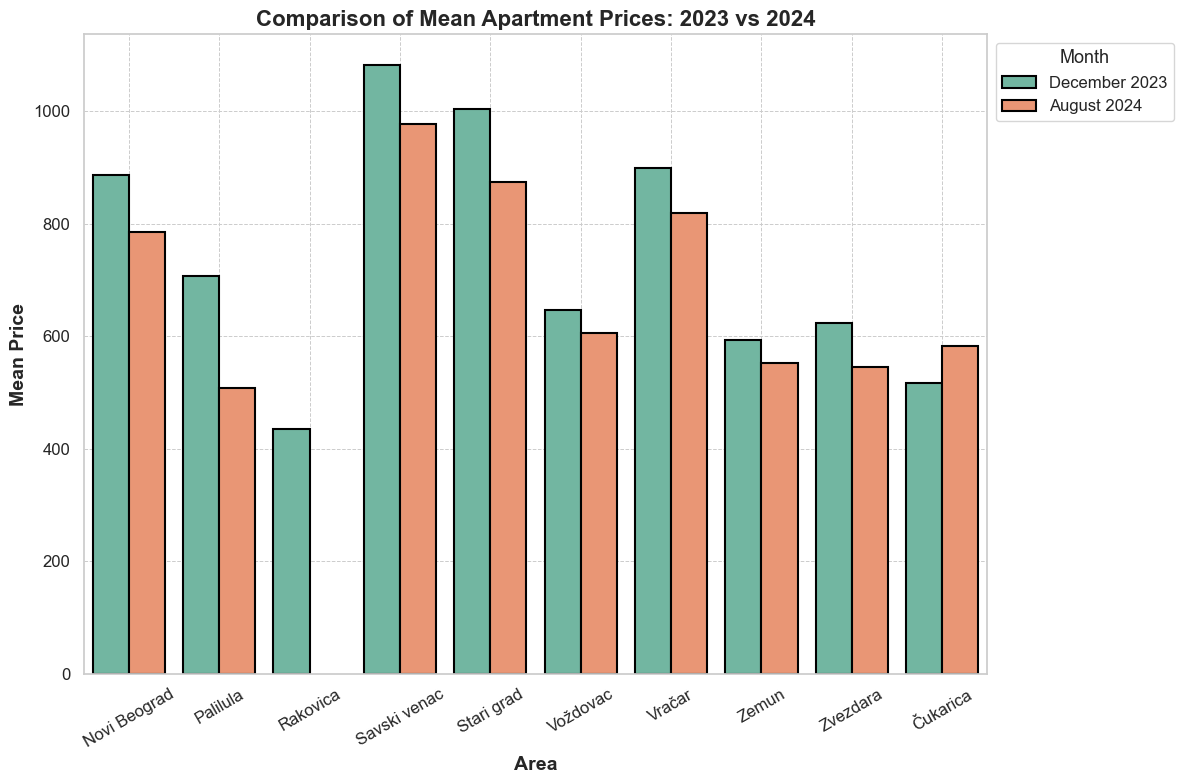

In [5]:
df_dec_halooglasi_clean['month'] = 'December 2023'
df_aug_halooglasi_clean['month'] = 'August 2024'

df_combined = pd.concat([df_dec_halooglasi_clean, df_aug_halooglasi_clean])
df_grouped = df_combined.groupby(['area', 'month'], as_index=False)['price'].mean()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_grouped,
    x='area',
    y='price',
    hue='month',
    hue_order=['December 2023', 'August 2024'],
    palette="Set2",
    edgecolor='black',
    linewidth=1.5
)

plt.xlabel('Area', fontsize=14, fontweight='bold')
plt.ylabel('Mean Price', fontsize=14, fontweight='bold')
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Comparison of Mean Apartment Prices: 2023 vs 2024', fontsize=16, fontweight='bold')

plt.legend(title='Month', title_fontsize='13', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True, which='major', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

### Visualizing Data Distribution with Histograms

In this section, we use histograms to visualize the distribution of various features in the cleaned apartment datasets for December 2023 and August 2024.

1. **December 2023 Data Distribution**:
    - We generate histograms for all the features in the `df_dec_halooglasi_clean` DataFrame.
    - **Figure Size**: The `figsize` parameter is set to `(15, 8)` to create large, clear plots that provide a detailed view of the data distribution.

2. **August 2024 Data Distribution**:
    - Similarly, we generate histograms for the `df_aug_halooglasi_clean` DataFrame to visualize the distribution of its features.
    - **Figure Size**: The same figure size `(15, 8)` is used to maintain consistency and facilitate easy comparison between the two datasets.

These histograms help us understand the underlying distribution of key variables, such as `price`, `sq_meters`, `room_number`, and others, and allow us to visually inspect any differences or similarities between the December 2023 and August 2024 data.


array([[<AxesSubplot:title={'center':'sq_meters'}>,
        <AxesSubplot:title={'center':'room_number'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'floor'}>]], dtype=object)

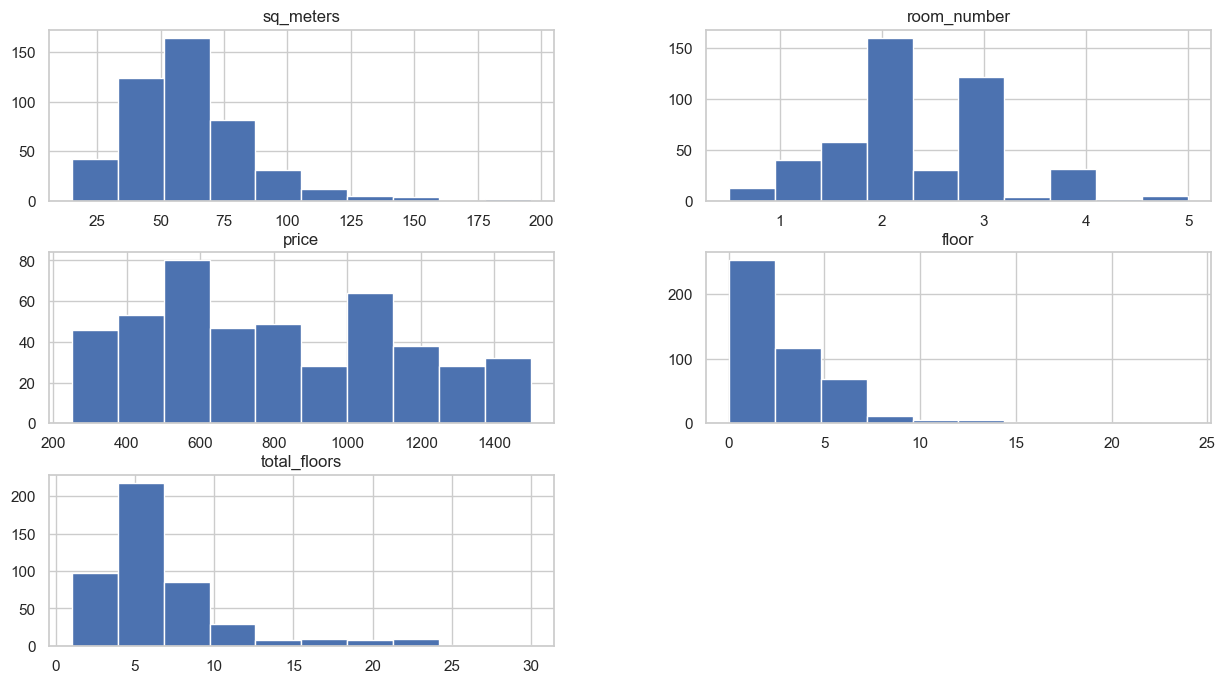

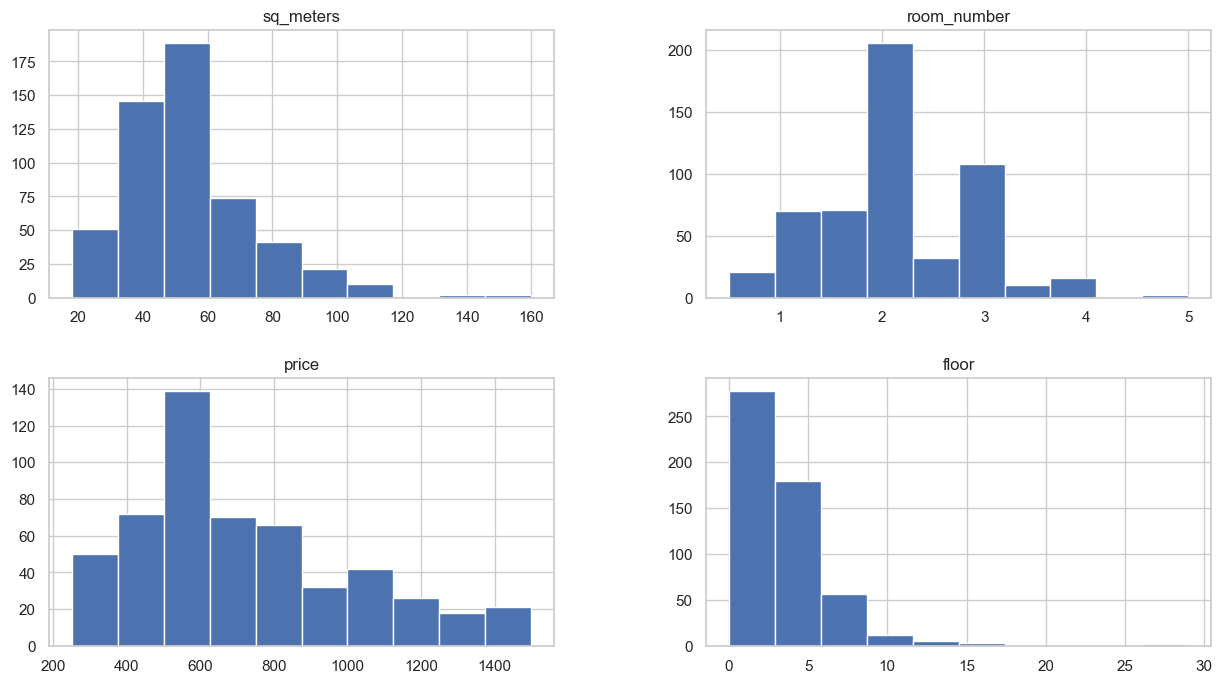

In [6]:
df_dec_halooglasi_clean.hist(figsize=(15, 8))
df_aug_halooglasi_clean.hist(figsize=(15, 8))

### Average Price Comparison Between December 2023 and August 2024 for Halooglasi.com

In this section, we compare the average apartment prices across different areas for December 2023 and August 2024. We have seen in previous visualization of mean prices per area that prices increased for all areas except "Cukarica". Now we  can calculate the percentage change in prices between these two months per area, and see the how the prices changed exactly.

1. **Calculate Mean Prices for December 2023**:
    - We group the `df_dec_halooglasi_clean` DataFrame by `area` and calculate the mean `price` for each area.
    - The resulting DataFrame is renamed to reflect that these prices are for "December 2023".

2. **Calculate Mean Prices for August 2024**:
    - Similarly, we group the `df_aug_halooglasi_clean` DataFrame by `area` and calculate the mean `price`.
    - The DataFrame is renamed to indicate that these prices are for "August 2024".

3. **Merge the DataFrames**:
    - We merge the two DataFrames (`mean_prices_dec_halooglasi` and `mean_prices_aug_halooglasi`) on the `area` column. The merge is performed using an outer join to include all areas that appear in either dataset.
    - **Dropping Missing Values**: After merging, we remove any rows with missing values using `dropna()` to ensure that the comparison only includes areas with data for both months.

4. **Calculate Percentage Change**:
    - We calculate the percentage change in prices from December 2023 to August 2024 using the formula:
        \[
        \text{Percentage Change} = \frac{\text{Price August 2024} - \text{Price December 2023}}{\text{Price December 2023}} \times 100
        \]
    - The calculated percentage change is formatted to two decimal places and appended as a new column, `percentage_change`.

5. **Display the Results**:
    - Finally, the `mean_prices_comp` DataFrame is printed, showing the average prices for December 2023 and August 2024, along with the percentage change for each area.

This analysis provides a clear view of how apartment prices have changed between December 2023 and August 2024, helping to identify trends and areas with significant price fluctuations.


In [7]:
# Avregare prices comparison between December and January for Halooglasi.com
mean_prices_dec_halooglasi = df_dec_halooglasi_clean.groupby('area')['price'].mean().reset_index()
mean_prices_dec_halooglasi = mean_prices_dec_halooglasi.rename(columns={'price': "price December 2023"})
mean_prices_aug_halooglasi = df_aug_halooglasi_clean.groupby('area')['price'].mean().reset_index()
mean_prices_aug_halooglasi = mean_prices_aug_halooglasi.rename(columns={'price': "price August 2024"})
mean_prices_comp = mean_prices_dec_halooglasi.merge(mean_prices_aug_halooglasi, on='area', how='outer')
mean_prices_comp = mean_prices_comp.dropna()
mean_prices_comp['percentage_change'] = ((mean_prices_comp['price August 2024'] - mean_prices_comp['price December 2023']) / mean_prices_comp['price December 2023']) * 100
mean_prices_comp['percentage_change'] = mean_prices_comp['percentage_change'].map('{:.2f}%'.format)
print(mean_prices_comp)


           area  price December 2023  price August 2024 percentage_change
0  Novi Beograd           887.209302         785.556604           -11.46%
1      Palilula           707.317073         507.333333           -28.27%
3  Savski venac          1082.600000         977.222222            -9.73%
4    Stari grad          1004.358974         875.178571           -12.86%
5      Voždovac           647.200000         605.454545            -6.45%
6        Vračar           898.604651         819.206349            -8.84%
7         Zemun           593.421053         552.902439            -6.83%
8      Zvezdara           624.200000         545.303030           -12.64%
9      Čukarica           517.647059         582.142857            12.46%


To enhance readability, we can visualize the percentage change with a bar plot, allowing for a quicker and more intuitive understanding of the data.

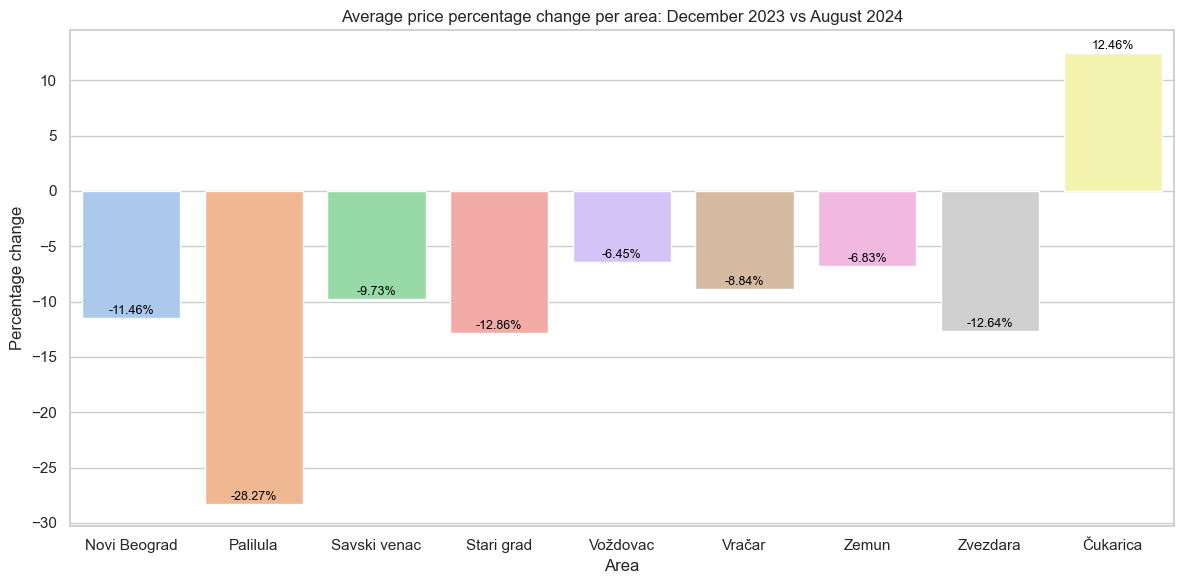

In [8]:
# Visualization of price comparison between December and January per area
mean_prices_comp['percentage_change'] = mean_prices_comp['percentage_change'].str.replace("%", "").astype(float)
mean_prices_comp['percentage_change'] = mean_prices_comp['percentage_change']
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='area', y="percentage_change", data=mean_prices_comp, palette="pastel", hue= 'area', legend=False)

plt.title("Average price percentage change per area: December 2023 vs August 2024")
plt.xlabel("Area")
plt.ylabel("Percentage change")

# Add annotations with differences above the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.tight_layout()
plt.show()

In [9]:
# Cleaning of data from Nekretnine.rs
data_aug_nekretnine = pd.read_excel("Excel_files\\Data nekretnine 11.08.24..xlsx")


### Data Cleaning for Nekretnine.rs

In this section, we clean and standardize the dataset from `Nekretnine.rs` to ensure it aligns with the dataset from `Halooglasi.com`. This preparation is crucial for combining the two datasets later in the analysis. After we clean the data for `Nekretnine.rs`, data will be aligned and in the same format of `Halooglasi.com`. After that, we can call already existing function `clean_data` to finalize the cleaning process so data can be used for further analysis.

1. **Updating Area Names**:
    - **Function `update_area`**: This function maps various area names from the Nekretnine.rs dataset to standardized area names used in the Halooglasi.com dataset.
        - For instance, areas like "Zemun" are updated to "Opština Zemun," and specific neighborhoods such as "Cvetkova pijaca" and "Neimar" are grouped under broader areas like "Opština Zvezdara" and "Opština Vračar". Prefix "Opština" will later be dropped once we call `clean_data` function that was created previously.
        - If an area name does not match any predefined conditions, it is left unchanged.

2. **Updating Heating Methods**:
    - **Function `update_heating`**: This function standardizes the heating method descriptions in the Nekretnine.rs dataset to match the categories in Halooglasi.com.
        - For example, "Centralno" is updated to "CG" (central heating), "Etažno" to "EG" (individual heating), and "TA peć" to "TA" (thermal storage heater).
        - Heating methods that do not match any predefined categories are set to `NaN`.

3. **Cleaning and Formatting the Data**:
    - **Function `clean_data_nekretnine`**:
        - **Area and Heating Updates**: The `area` and `heating` columns are updated using the `update_area` and `update_heating` functions.
        - **Floor Data**:
            - Rows with missing or invalid floor data ("-") are removed.
            - The term "prizemlje" (ground floor) is replaced with 0 for consistency.
            - The `floor` column is converted to numeric, with invalid entries set to `NaN` and then replaced.
            - Remaining missing or invalid entries are removed, and the `floor` column is converted to integers.
        - **Room Number**: Invalid room number entries ("-") are replaced with `NaN`, and rows with missing room numbers are removed.
        - **Area Filtering**: Entries where the `area` starts with "Beograd" are excluded to ensure only valid neighborhood names are included.
        - **Price Formatting**: The `price` column is converted to a string, and any spaces are removed to standardize the format.

4. **Applying the Cleaning Process**:
    - The `clean_data_nekretnine` function is applied to the August 2024 dataset (`data_aug_nekretnine`), resulting in `data_aug_nekretnine_clean`.
    - The cleaned dataset is then passed through the `clean_data` function (previously used for Halooglasi.com) to ensure consistency across both datasets.

This detailed cleaning process ensures that the Nekretnine.rs dataset is standardized and aligned with the Halooglasi.com dataset, allowing for accurate comparison and analysis between the two sources.


In [10]:

# Update area namings to adjust to data from halooglasi.com before combining data sets
def update_area(value):
    if "Zemun" in value:
        return "Opština Zemun"
    elif any(char in value for char in ['Cvetkova pijaca', 'Učiteljsko naselje', 'Đeram pijaca', 'Lion', 'Vukov', 'mokri', 'Kalenić']):
        return "Opština Zvezdara"
    elif any(char in value for char in ['Neimar', 'Čubura', 'Autokomanda', 'Južni bulevar', 'Centar',  'Slavija', "Crveni krst"]):
        return "Opština Vračar"
    elif any(char in value for char in ['Stari Grad', 'Dorćol']):
        return "Opština Stari grad"
    elif any(char in value for char in ['Senjak', 'Klinički centar', 'Savski', 'na vodi']):
        return "Opština Savski venac"
    elif any(char in value for char in ['Tošin bunar', 'Novi Beograd', 'Bežanijska kosa III']):
        return "Opština Novi Beograd"
    elif any(char in value for char in ['Cerak', 'Žarkovo', "Banovo brdo", "Čukarička padina"]):
        return "Opština Čukarica"
    elif any(char in value for char in ['Lekino brdo', 'Voždovac', 'Braće Jerković']):
        return "Opština Voždovac"
    elif "Tašmajdan" in value:
        return "Opština Palilula"
    else:
        return value

# Update heating method of apartment to adjust to data from halooglasi.com before combining data sets
def update_heating(value):
    if "Centralno" in value:
        return "CG"
    elif "Etažno" in value:
        return "EG"
    elif "TA peć" in value:
        return "TA"
    else:
        return np.nan

def clean_data_nekretnine(df): 
    df = df.copy()   
    df['area'] = df["area"].apply(update_area)
    df['heating'] = df["heating"].apply(update_heating)
    df = df[df['floor'] != "- "]
    df['floor'] = df['floor'].apply(lambda x: 0 if 'rizemlje' in str(x) else x)
    df['floor'] = pd.to_numeric(df['floor'], errors='coerce')
    df['floor'] = df['floor'].replace(-1, np.nan)
    df['room_number'] = df['room_number'].replace('-', np.nan)
    df.dropna(subset=['floor', 'heating', 'room_number'], inplace=True)
    df['floor'] = df['floor'].astype(int)
    df = df[~df['area'].str.startswith('Beograd')]
    df['price'] = df['price'].astype(str)
    df['price'] = df['price'].str.replace(" ", "")

    return df

data_aug_nekretnine_clean = clean_data_nekretnine(data_aug_nekretnine)
data_aug_nekretnine_clean = clean_data(data_aug_nekretnine_clean)

In [11]:
data_aug_nekretnine_clean.describe()

Novi Beograd    119
Vračar           60
Stari grad       49
Voždovac         35
Savski venac     26
Zvezdara         19
Zemun            16
Čukarica         12
Name: area, dtype: int64
CG    308
EG     28
Name: heating, dtype: int64


,sq_meters,room_number,price,floor
count,336.000000,336.000000,336.000000,336.000000
mean,60.453988,2.369048,902.645833,3.648810
std,18.790998,0.718078,307.386911,3.137905
min,0.000000,1.000000,300.000000,0.000000
25%,49.000000,2.000000,650.000000,1.000000
50%,58.000000,2.000000,850.000000,3.000000
75%,71.000000,3.000000,1200.000000,5.000000
max,135.000000,5.000000,1500.000000,20.000000


In [12]:
# Preparing data to compare mean prices for January for websites Nekretnine.rs and Halooglasi.com
mean_prices_aug_nekretnine = data_aug_nekretnine_clean.groupby('area')['price'].mean().reset_index()
mean_prices_aug_nekretnine = mean_prices_aug_nekretnine.rename(columns={'price' : "price Nekretnine"})
mean_prices_aug_halooglasi = mean_prices_aug_halooglasi.rename(columns={'price August 2024': "price Halooglasi"})
mean_prices_aug_grouped = mean_prices_aug_halooglasi.merge(mean_prices_aug_nekretnine, how='outer', on='area')
mean_prices_aug_grouped.dropna(subset=['price Nekretnine'], inplace=True)
mean_prices_aug_grouped.head(50)


,area,price Halooglasi,price Nekretnine
0,Novi Beograd,785.556604,869.907563
2,Savski venac,977.222222,1240.384615
3,Stari grad,875.178571,1052.857143
4,Voždovac,605.454545,741.714286
5,Vračar,819.206349,932.833333
6,Zemun,552.902439,656.250000
7,Zvezdara,545.303030,886.842105
8,Čukarica,582.142857,554.166667


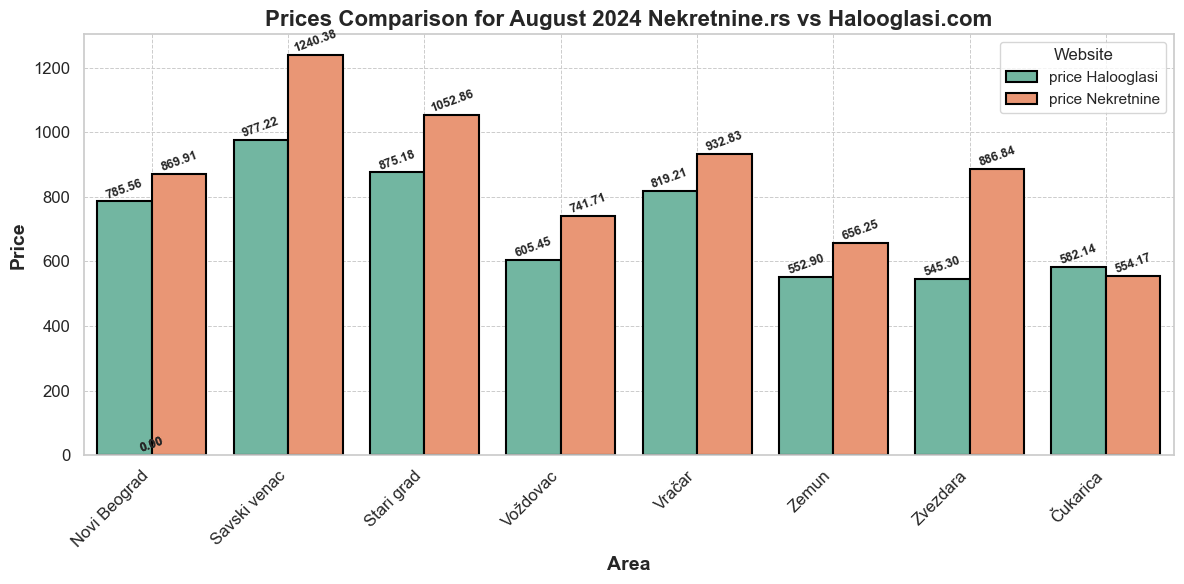

In [13]:
# Visual representation of average price comparison between Halooglasi.com and Nekretnine.rs for January 2024
mean_prices_comp_melted = pd.melt(mean_prices_aug_grouped[['area', 'price Halooglasi', 'price Nekretnine']], id_vars=['area'], var_name='Website', value_name='price')
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='area', y='price', hue='Website', data=mean_prices_comp_melted, palette='Set2', edgecolor='black', linewidth=1.5)

# Add annotations with differences above the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_x() + p.get_width() / 2

    ax.annotate(f'{height:.2f}', (width, height), ha='center', va='bottom', rotation=20, fontsize=9, fontweight='bold')

plt.title('Prices Comparison for August 2024 Nekretnine.rs vs Halooglasi.com', fontsize=16, fontweight='bold')
plt.ylabel('Price', fontsize=14, fontweight='bold')
plt.xlabel('Area', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='major', linestyle= '--', linewidth=0.7)
plt.tight_layout()

plt.show()

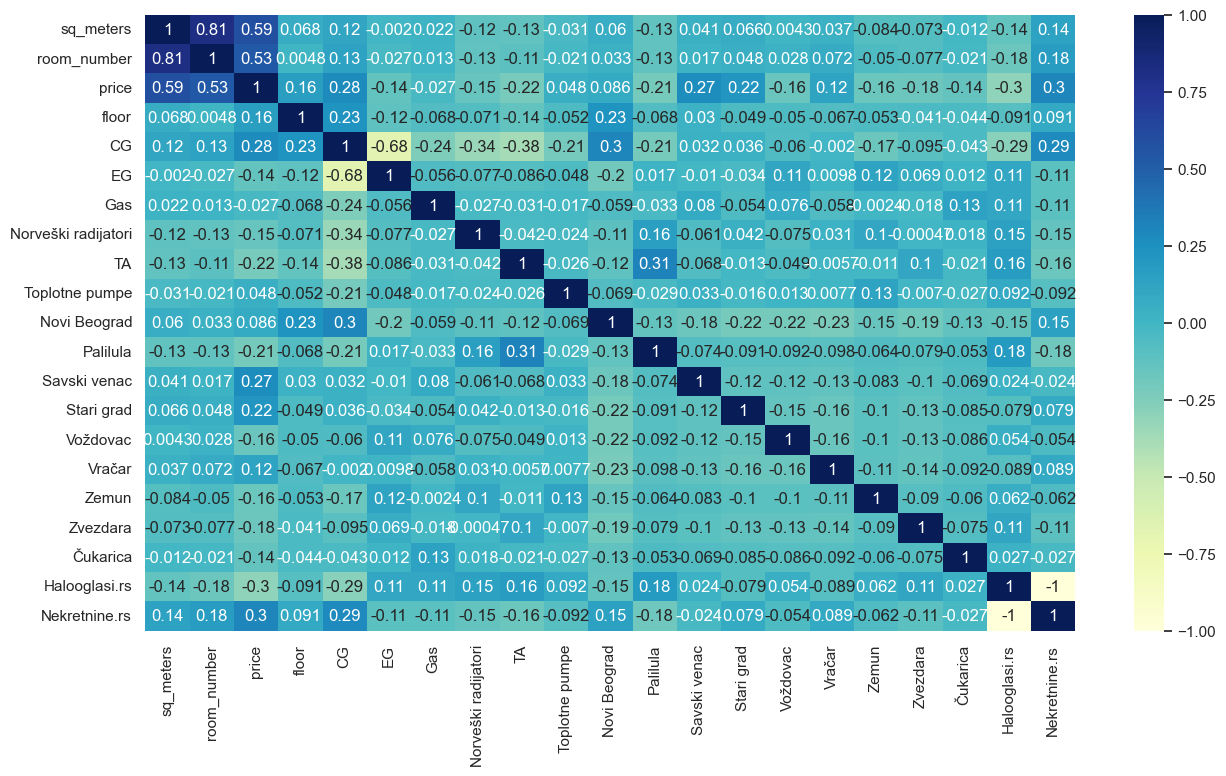

In [14]:
# Preparing data for price prediction
data_aug_nekretnine_clean['website'] = 'Nekretnine.rs'
df_aug_halooglasi_clean['website'] = 'Halooglasi.rs'
data_grouped = pd.concat([data_aug_nekretnine_clean, df_aug_halooglasi_clean], ignore_index=True)
data_grouped = data_grouped.drop_duplicates()
df_processed = data_grouped.join(pd.get_dummies(data_grouped.heating)).drop(['heating'], axis=1)
df_processed = df_processed.join(pd.get_dummies(df_processed.area)).drop(['area'], axis = 1)
df_processed = df_processed.join(pd.get_dummies(df_processed.website)).drop(['website'], axis = 1)

# Correlation matrix to identifying relationships for price prediction
plt.figure(figsize=(15, 8))
sns.heatmap(df_processed.corr(), annot=True, cmap='YlGnBu')
df_processed.to_excel("Excel_files\\Processed data combined.xlsx", index=False)